### 타이타닉 : Intermediate Ver.

Kaggle을 진행하는 단계

캐글은 일반적으로 다음과 같은 단계로 이루어집니다.

1. 문제정의 (Question or Problem Definition)
2. 훈련, 테스트 데이터 (Acquire Training And Testing Data)
3. 데이터 전처리 (Wrangle, Prepare, Cleanse The Data)
4. 데이터 분석 (Analyze, Identify Patterns, And Explore The Data)
5. 모델만들기 & 문제 해결 및 예측 (Model, Predict And Solve The Problem)
6. 시각화 및 문제 해결 단계 작성 (Visualize, Report, And Present The Problem Solving Steps And Final Solution)
7. 결과 제출 (Supply Or Submit The Result)

이 순서를 기본으로 캐글을 진행하게 될 것입니다. 하지만 분명 일부 예외가 있는 사례가 있습니다.

- 여러 과정을 합께 진행합니다. 예를 들면 시각화를 통해 분석을 진행합니다
- 순서는 바뀔 수 있습니다. 데이터 전처리 전후로 데이터를 분석합니다.
- 일부 과정은 중복됩니다. 시각화는 많이 사용됩니다.
- 일부 과정은 생략될 수 있습니다.

### WorkFlow Goals

문제를 해결하는 과정에는 7가지 핵심 목표가 있습니다.

1. Classifying : 데이터에 대한 분류입니다. 상관관계를 알기위해서 또는 필요에 따라서 특성을 분류해야할 수 있습니다.

2. Correlating : 좋은 결과를 만들기 위해 각 특성의 상관관계를 추측하거나, 검증해야 하는 경우가 많습니다. 아래 단계들을 이용하여 특성과 정답 간의 상관관계를 알아내야 합니다.

3. Converting : 일부 특성의 경우에는 범주형을 수치형으로 바꾸는 등 변환이 필요합니다. 또한 대부분의 머신러닝 알고리즘은 문자열로 이루어진 범주형을 입력으로 받을 수 없으니, 대부분의 문제에서 필수적인 과정입니다.

4. Completing : 일부 손실된 데이터는 채워줘야 할 필요가 있습니다. 빈 데이터는 알고리즘에 있어 이상치로 존재하며 알고리즘의 성능을 낮출 수 있습니다.

5. Correcting : 데이터도 경우에 따라 오류가 있거나, 노이즈가 섞일 가능성이 있습니다. 이런 경우 일부는 직접 수정해야 하는 경우가 생깁니다.

6. Creating : 특성을 통해 새로운 특성을 만들수도 있습니다.

7. Charting : 그래프와 차트를 통해 결과를 위한 과정을 더 직관적으로 볼 수 있습니다. 시각화를 통해 얻은 직관으로 결과에 필요한 작업을 알 수 있습니다.

### 문제 정의
많은 컴퓨터 관련 대회와 마찬가지로 Kaggle은 문제에 대한 입력과 출력에 대한 정보를 제공합니다.

어떤 문제를 해결하기 위해 어떤 입력을 제공하고, 어떤 결과를 도출하여라~

이 문제에서는 타이타닉 침몰 사고의 실제 데이터를 통해, 생존유무를 예측하는 문제입니다.

- Overview에서는 문제에 대한 정보와 Goal 등을 알 수 있습니다.
- Data에서는 정보에 대한 특성 등을 알 수 있습니다.

문제에 대한 정의는 중요합니다. 왜냐하면 문제에 따라 다양한 사고가 가능하기 떄문입니다. 예시로 본 문제에서 주는 데이터에는 가족 정보, 나이 정보, 성별 정보 등이 있습니다.

영화 '타이타닉'을 보신 분들은 알겠지만, 마지막에 여성과 아이를 중심으로 구조보트에 태우는 장면이 있습니다. 이런 사전 정보 또는 추측을 통해 데이터에 대한 중요성 정도를 예측할 수 있습니다.

또한 문제에 따라 분류, 회귀 등 목적을 알 수 있기에 다음과 같이 필요한 라이브러리를 미리 호출할 수 있습니다.

In [4]:
# Data Analysis And Wrangling

import pandas as pd
import numpy as np
import random as rnd

# Visualization

import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 훈련, 테스트 데이터

데이터의 경우에는 Python의 Pandas 패키지를 사용하는 것이 좋습니다. 다른 타입보다 데이터 처리가 쉽기 때문입니다. 훈련과 테스트 데이터의 경우에는 동일한 전처리 과정이 필요한 경우가 있기에 미리 묶어서 관리할 수도 있습니다.

In [6]:
# df는 DataFrame을 의미합니다.
train_df = pd.read_csv('C:/Users/1/python/titanic/train.csv')
test_df = pd.read_csv('C:/Users/1/python/titanic/test.csv')
combine = [train_df, test_df]

### 데이터 분석하기 (1) : 기본데이터

문제 이해와 데이터 입력 후에 가장 우선적으로 해야하는 것은 주어진 데이터에 대한 분석입니다. Pandas는 이런 기초 분석에 있어서 유용합니다.

#### 이 데이터 셋에서 사용할 수 있는 특성

데이터 셋에서 각각의 특징은 다음 페이지에 묘사되어 있습니다 Kaggle data page

In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### 범주형과 수치형

데이터에는 크게 두 가지 타입으로 나눌 수 있습니다.

1. 범주형 데이터 : 몇 개의 범주로 나주어진 데이터

- 명목형 : 성별, 혈액형 등 단순한 분류
- 순서형 : 개개의 값들은 이산적이며 순서 관계가 존재하는 자료

2. 수치형 데이터 : 이산형 연속형으로 이루어진 데이터, 숫자로 표시

- 이산형 : 이산적인 값을 갖는 데이터
- 연속형 : 연속적인 값을 갖는 데이터

지금의 데이터 셋을 살펴보면

- 범주형 : Survived, Sex, Embarkd/PClass
- 수치형 : SibSp, Parch/Age, Fare

In [8]:
# Preview The Data : 중간점검
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 혼합형 데이터

숫자, 알파벳으로 이뤄진 데이터로 특성을 찾기 어려운 데이터입니다. 이 데이터는 수정을 통해 원하는 정보를 얻어야 합니다.

- Ticket, Cabin이 그런 데이터에 해당합니다.

### 오타 가능성이 있는 특성 

매우 큰 데이터에서는 오타와 같이 사소한 정보는 발견하지 못할 수 있습니다. 하지만 비교적 작은 데이터에는 처리가 가능합니다.

- Name 과 같은 경우 오타가 있을 수 있습니다. 대체 이름, 호칭 등이 그런 요소입니다.
- 이름에서는 PhD나 특별한 정보를 가져올 수 있지만, 어려울 것으로 예상되긴 합니다.

In [9]:
# Preview The Data : 중간 점검
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 데이터 공백, NULL, 빈 값

데이터에 빈 값은 반드시 해결해야 하는 부분입니다. 이 부분은 후에 정보를 점검하며 찾아야 합니다. 빈 값에 대한 추측은 다양할 수 있습니다.

수치의 경우에는 최솟값, 중앙값, 평균 등으로 채우고, 범주 경우에은 최빈값 등으로 채웁니다.

### 데이터는 어떤 형태로 들어오나 

이는 매우 중요한 요소입니다. 범주형 데이터도 수치로 들어올 수 있고 머신 러닝 함수들에 입력하기 전에 더 좋은 형태로 바꿔야 하기 때문입니다.

- 7개의 interger of float
- 5개의 string (object)

이런 데이터에 대한 특성은 info 메서드로 확인할 수 있습니다.

In [10]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

### 수치형 데이터 분포 

데이터에 대한 분포를 살피는 것은 데이터에 대한 이해를 높일 수 있습니다. 이 데이터에서는 다음과 같은 정보를 얻을 수 있습니다.

- 891명의 샘플로 총 인원의 40%가 데이터로 주어집니다.
- Survived는 0과 1로 이루어진 범주형 데이터입니다.
- 대부분의 승객(>75%)은 부모 또는 자식과 함께 타지 않았습니다.
- 30%의 승객은 형제자매나 배우자와 함께 탔습니다.
- Fare(요금)의 경우, 매우 적은 수의 승객이 512$ 보다 많이 지불했습니다.
- 나이가 많은 승객은(65-80)의 수는 1% 미만입니다.


In [11]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Goncalves, Mr. Manuel Estanslas",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 범주형 데이터의 분포

.describe() 메서드를 통해 데이터에 대한 통계를 살필 수 있고, include="all" 매개변수 세팅을 통해 수치형이 아닌 범주형 데이터도 분석할 수 있습니다.

위 데이터에서는 다음과 같은 정보를 볼 수 있습니다.

- 이름(Name)은 모두 다르다.
- 성별(Sex)은 577/891이 남자로 약 65%를 차지한다.
- 호실(Cabin)은 양도 적고, 중복도 많이됩니다. 일부 손님들이 호실을 공유한 것으로 보입니다.
- 승선(Embarked)은 총 3개의 종류가 있고, S가 제일 많다.
- 티켓(Ticket)은 중복이 매우 적다.

In [13]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goncalves, Mr. Manuel Estanslas",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### 가정을 기반으로한 데이터 분석

지금까지 한 기초적인 데이터 분석과 더불어 다음과 같은 가정을 더 할 수 있습니다. 가정은 후에 몇 작업을 통해 더 검증해야할 수도 있습니다.

**Correlating.**

우리는 각 특성이 생존 여부에 미치는 영향들을 알고 싶습니다. 프로젝트를 시작하며 초안을 만들고, 후에 모델링된 상관관계와 일치하는지 확인합니다. 

**Completing.**

1. Age는 분명 생존 여부와 관계가 있는 특성이기에 채워넣어야 합니다.
2. Embarked도 생존 여부와 관계가 있다고 생각되고, 다른 특성과 연관이 있으므로 채워넣어야 합니다.

**Correcting.**

1. Ticket의 경우에는 22%나 중복되었고, 생존 여부와 관계가 없다고 생각되니 특성에서 제거합니다.
2. Cabin은 훈련 데이터와 테스트 데이터 모두 너무 많은 Null 값을 가지고 있으니 제외시킵니다.
3. PassengerId는 훈련 데이터에서 생존 여부와 관계없으니 제거합니다.
4. Name은 형식이 다양하고, 생존 여부와 직결된 관계가 없으니 제거해도 될 것 같습니다.

**Creating.**

1. Family라는 특성을 Parch와  SibSp를 합친 값으로 만듭니다.
2. Name 특성을 수정하여 Title이라는 특성을 만들것입니다.
3. Age 특성을 수치형-연속형 데이터에서 Age bands, 즉 나이대라는 범주형 데이터로 만듭니다.
4. Fare 범위로 새로운 특성을 만들어 분석을 도울 예정입니다.

**Classifying.**

기존 디스크립션에 서술된 정보를 통해 가정을 할 수 있습니다.

1. Women (Sex=female)이 더 많이 생존했다.
2. Children (Age<?) 이 더 많이 생존했다.
3. The upper-class passengers (Pclass=1) 이 더 많이 생존했다.

## pivoting features로 분석하기

위의 관측과 예측들은 빠르고 간단하게 확인해볼 수 있습니다.

지금은 Null이나 , NaN 등 빈 값이 없는 특성값에 대해서만 할 수 있습니다.
여기서는  Pclass, Sex, Sibsp and Parch 특성에 대해서 살펴봅니다.

- **Pclass** : Pclass=1인 승객에 대해서 생존 확률이 0.5보다 높은 것을 알 수 있습니다. 이는 모델에 특성으로 넣으면 됩니다.
- **Sex** : 실제로 여성 승객이 생존 확률이 74%로 높은 수치임을 알 수 있습니다. 
- **SibSp and Parch** : 다음 두 특성은 상관관계를 찾기 어렵습니다. 이런 경우에는 특성을 합쳐 새로운 성질을 찾아내야합니다.


In [14]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### 데이터 시각화를 통한 분석

***수치형 특성의 상관관계***

이제 수치형 데이터들과 생존 여부간의 상관관계를 살펴보도록 하겠습니다.

히스토그램 차트는 연속형 수치형 변수를 분석하는 데 매우 유용합니다. 연속형 데이터를 사용자 지정 범위에 따라 차트로 나타내어, 분포를 통해 패턴 또는 유용한 정보를 추출할 수 있습니다.

Observations

- 영아(Age <= 4)는 생존 확률이 매우 높다.
- 최고연령 승객은 살았다. (Age = 80)
- 15세에서 25세 사이의 사람들은 생존하지 못한 사람이 많다.
- 대부분의 승객은 15~35세이다.

Decisions

이 간단한 분석으로 우리는 다음과 같은 가정을 할 수 있습니다.

- Age 특성은 모델에 필요하다.
- Age에서 NULL 값을 채워야 한다.
- 나이를 범위에 따라 그룹화하여야 한다. (연속형 -> 범주형)

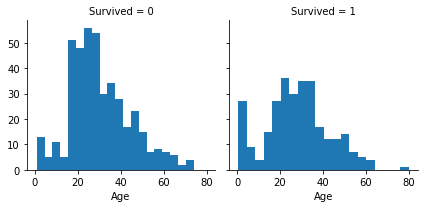

In [20]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins = 20)

***수치형과 서수형 특성의 상관관계***

1개의 그래프로도 여러 특성을 조합하여 상관관계를 확인해볼 수 있습니다. 이는 수치형, 범주형, 특성에서 수치를 가지고 있는 데이터에서 가능합니다.

Observations

- Pclass = 3인 승객수가 가장 많습니다. 하지만 대다수가 생존하지 못했습니다.
- Pclass = 2, Pclass = 3에서 영아 승객은 대부분 생존했습니다.
- Pclass = 1 인 승객들은 대부분 생존했습니다.
- Pclass에 따라 승객의 나이 분포는 다릅니다.

Decisions

- Pclass는 모델에 필요한 특성입니다.

C:\Users\1\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


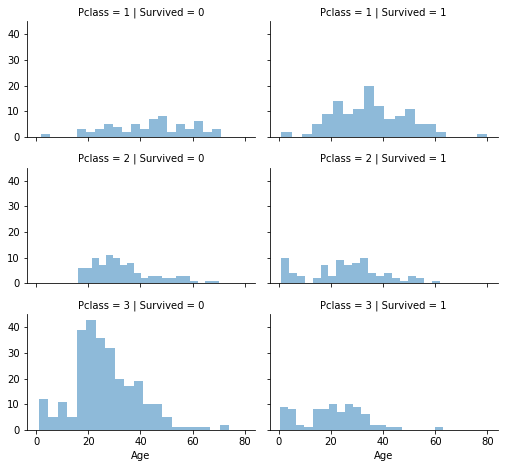

In [22]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend();

### 범주형 특성의 상관관계

이제 범주형 특성을 살펴봅시다.

Observations

- 여성 승객은 높은 비율로 생존했습니다.
- 예외적으로 Embarked = C인 남성 승객의 생존 비율은 높습니다. 이는 Pclass와의 상관관계일 수 있으며, 특성들은 꼭 Survived와 직접적으로 연관될 필요는 없습니다.

Decisions

- Sex 특성은 모델에 필요합니다.
- Embarked 특성은 빈 부분을 채워야 하고 , 모델에 있어 필요한 특성입니다.


C:\Users\1\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\1\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\1\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


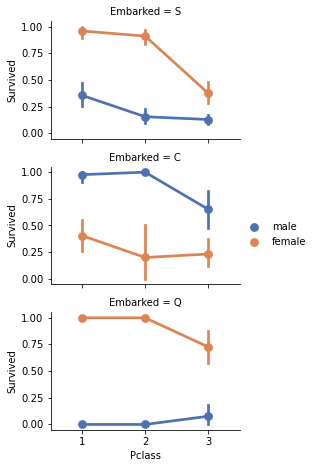

In [23]:
# Grid = sns.FacetGrid(train_df, col = 'Embarked')

grid = sns.FacetGrid(train_df, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend();

### 범주형 특성과 수치형 특성의 상관관계

이제 수치형 값이 아닌 범주형 특성과 수치형 특성의 상관관계를 확인하려고 합니다. Embarked, Sex, Fare과 Survived의 특성을 살펴볼 수 있습니다.

Observations

- 높은 요금을 낸 승객은 생존율이 더 높았다.
- 생존율과 Embarked의 상관관계

Decisions

- Fare 특성의 분류를 고려

C:\Users\1\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\1\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


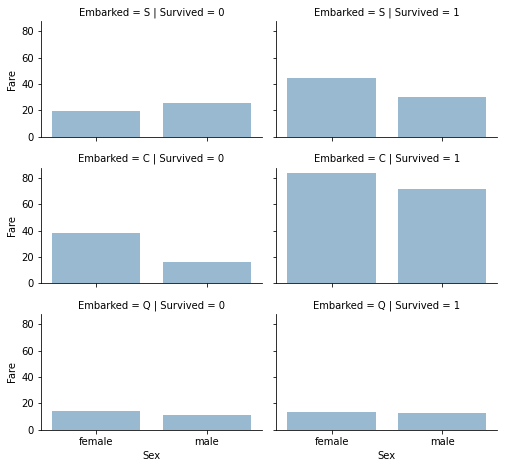

In [25]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### 데이터 처리하기

지금까지 주어진 데이터에 대해 가정을 하며, 일부 필요한 특성에 대한 선택을 하였습니다. 하지만 지금까지는 데이터를 하나의 특성으로만 보았고, 특성에 대한 전처리나 수정 등을 하지는 않았습니다.

이제 수정과 생성 등을 통해 목표에 더 적합한 데이터를 만들어보도록 합시다.

#### 특성 제거

특성 제거는 좋은 방법 중 하나입니다. 더 적은 데이터를 사용하면 속도와 분석 면에서 매우 큰 장점을 가집니다. 더 빠르고, 더 분석하기는 쉬워집니다.

위에서 내린 몇 가지 가정을 통해 Cabin과 Ticket의 특성을 제거합니다. 훈련 데이터와 테스트 데이터에서 모두 제거해야합니다.

In [26]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### 기존 특성에서 새로운 특성 만들기

Name 특성은 매우 까다로운 특성이지만, 일부 Advanced 커널에서 다루는 요소입니다.

여기서는 Title 이라는 특성을 만듭니다. 정규표현식을 이용하여 Name에서 . 앞에 까지를 자릅니다. expand = Flase 를 이용하여 DataFrame을 반환합니다.

Observations

- 대부분의 Title은 Age 범위로 그룹을 정확하게 묶습니다.
- Title에 따른 Age 범위의 생존율은 약간 다릅니다.
- 일부 Title은 대부분 생족했거나, 대부분 생존하지 않았습니다.

Decision

- Title 특성을 사용하도록 합시다.

In [27]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


이 타이틀 중 적은 수만 있는 타이틀은 Rare로 치환할 수 있습니다. 변수의 수를 줄여주고 더 좋은 결과를 만들 수 있습니다.

In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


이 범주형 데이터를 서수형 데이터로 바꿀 수 있습니다.

In [31]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


이제 Name 특성을 Title로 변환했으니, 이름은 제거해도 됩니다. 또한 PassengerId 특성도 함께 지웁니다.

In [32]:
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 범주형 특성 전환하기

이제 문자열로 이루어진 특성을 수치형으로 변환할 수 있습니다. 대부분의 알고리즘은 수치형을 입력으로 받기에 변환이 필요합니다.

우선 Sex의 특성을 female = 1, male = 0 으로 변환할 수 있습니다.

In [34]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female' : 1, 'male' : 0} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 수치형 연속형 특성 채우기

이제 빈 부분의 데이터를 예측하고 채워넣어야 합니다. 우선 Age 특성을 먼저 살펴보겠습니다.

수치형 - 연속형 특성을 채우는 3가지 방법을 보도록 하겠습니다.

1. 평균과 분산을 이용한 랜덤
2. 각 특성의 중앙값으로 사용(Pclass, Gender)
3. 중앙값을 기준으로 평균과 분산 사용

1,3 방법은 랜덤 노이즈 값이 모델에 안좋은 영향을 미칠 수 있으니, 여기서는 2번을 이용합니다.

C:\Users\1\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


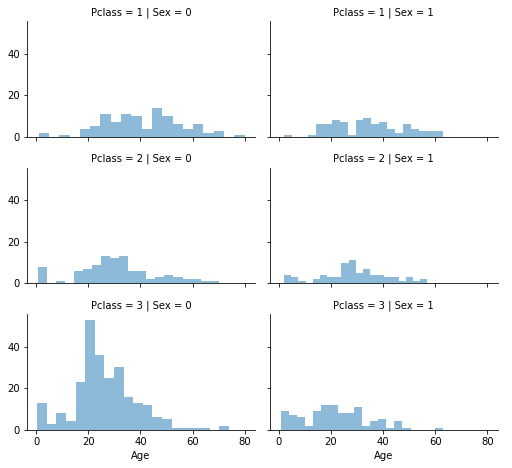

In [35]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend()

Pclass와 Sex 특성을 이용하여 Age를 예상하는 코드를 짜봅시다

In [37]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Sex(0,1) 과 Pclass(1,2,3) 의 총 6가지 조합에 대해서 구해봅시다.

In [38]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median() # 중앙값 사용

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


이제 나이를 연령대별로 묶어서 생존율과 연결해봅시다.

In [41]:
train_df['AgeBand'] = pd.cut(train_df["Age"],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by='AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


이제 AgeBand 특성을 지우고 Age를 범주형으로 변환하겠습니다.

In [42]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [45]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### 기존 특성을 합쳐 새로운 특성 만들기

FamilySize 특성을 Parch와 SibSp를 이용하여 만들어보겠습니다.

In [47]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


여기서 혼자인 IsAlone이라는 새로운 특성을 만들 수 있습니다.

In [48]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


이제 IsAlone을 남기고 Parch, SibSp, FamilySize 를 이제 제거합니다. 30:70 이면 꽤 유의미한 특성입니다.

In [49]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


그 외에도 Pclass와 Age 특성을 합친 가상 특성을 만들 수 있습니다.

In [50]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### 범주형 특성 채우기

Embarked 특성은 S, Q, C 값을 가집니다. 하지만 훈련 데이터셋어 총 2개의 값이 NULL 값입니다. 최빈값으로 이를 채워봅시다.

In [59]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [60]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### 범주형 특성을 수치형으로 변환하기

이제 채워진 Embarked 특성을 수치형으로 모두 바꿉시다.

In [61]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### 빠르게 수치형 특성 채우기 + 변환하기

이제 Fare 특성이 남았습니다. 1명이 비었습니다. 이 한명은 코드 한줄로 빠르게 채워봅시다.

이번에는 값을 채우기 위해 다른 상관관계를 굳이 추가 분석하지 않습니다. 이 채우기의 목표는 모델에 입력하기 위한 데이터 포멧의 완성이기 때문입니다.

In [62]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


지금까지 해온 것과 비슷하게 Fare 특성을 확인해봅시다.

In [63]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [64]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


다시 한번 테스트 데이터셋을 확인해 봅시다.

In [65]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


### 모델, 예측과 해결

이제 모델 훈련할 준비는 모두 끝났습니다. 예측 모델 알고리즘은 60개가 넘기 때문에 필요하고, 효율이 좋은 알고리즘을 이해하고 선택할 줄 알아야합니다. 이 문제는 분류 문제로 지도학습에 속하는 문제입니다. 지도학습에 사용되는 알고리즘은 다음과 같습니다.

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

### 훈련, 검증, 테스트 셋

Beginner와 마찬가지로 Intermediate 에서도 train set로 score를 구하는 이유입니다.

보통은 train, test만 언급되지만, 더 확실하기 위해서는 train 데이터셋을 나누어 validation dataset을 만드는 것이 좋습니다. test data는 결과값을 모르기에 score을 낼 수가 없습니다. 그렇기에 훈련 데이터셋이 과적합되었는지 체크하기 위해서는 훈련 데이터셋에서 랜덤으로 추출한 검증 데이터셋을 만드는 것입니다.

그렇기에 캐글에서 고득점을 얻기 위해서는 cross validation과 validation set이 중요한 것입니다.

scikit-learn에서 train_test_split함수로 train을 나눌 수 있습니다. 하지만 이번에도 간단하게 따로 검증 셋을 만들지는 않겠습니다. 다음 커널에 시도해보도록 하겠습니다.

In [66]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression은 시작 단계에서 돌려보기 좋은 모델입니다. 이 모델은 종속 변수와 독립 변수 간의 관계를 구체적인 함수로 나타내어 예측 모델에 사용합니다. 이름과 다르게 분류 알고리즘입니다.

훈련 데이터 셋에서 Score를 확인합니다.

In [68]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

로지스틱 회귀는 각 특성이 미치는 영향을 알아볼 수 있습니다. 결정 함수에서 사용되는 계수 값들을 알 수 있습니다.
양의 계수는 확률을 증가시키고, 음의 계수는 확률을 갑소시킨다고 이해하면 됩니다.

In [69]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


다음은 Support Vector Machine, SVM이라고 불리는 지도학습 모델을 사용합니다. 분류와 회귀에 모두 사용되는 알고리즘입니다.

In [71]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.83

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

In [73]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

In [74]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.35

In [75]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\1\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.46

In [76]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.3

In [77]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [78]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

### 모델 비교

이제 위에서 각각 구한 결과 값을 바탕으로 하나를 모델로 선택해봅시다. Random Forest와 Decision Tree가 점수가 같지만, Random Forest가 과적합이 더 적게 일어나브로 Random Forest를 선택합니다.

In [79]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,82.83
2,Logistic Regression,81.37
7,Linear SVC,79.46
5,Perceptron,79.35
4,Naive Bayes,76.88
6,Stochastic Gradient Decent,74.30


In [ ]:
이제 to_csv로 제출파일을 만들어 제출해봅시다.

In [80]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)